# ✅KAGGLE 타이타닉 생존율 예측

📌본 학습은 https://www.kangtaeho.com/89 분석을 토대로 코드 변형없이 직접 따라해보면서 분석내용에 대해 저만의 방법으로 정리해봤습니다. 마지막 검증 부분은 아직 따라하기조차 어려워 생략했습니다.

### ❗진행과정

**1. Import & Data check**

**2. EDA**

**3. Data Preprocessing & Feature Engineering**

**4. Modeling**

**5. Validation**

### 1️⃣Import & Data check
필요한 라이브러리 및 모듈 선언 및 데이터에 대한 개략적인 정보 확인

> * **데이터 정보 확인**

> * **결측치 확인**

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

import missingno as msno
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [69]:
df_train=pd.read_csv('../data/train_titanic.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 데이터의 행과 열에 대한 정보 확인

In [70]:
df_train.shape

(891, 12)

### 결측치 확인

In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [72]:
#결측치 비율 확인
for col in df_train.columns:
    msperc = 'column : {:>10}\t Percent of NaN value: {: .2f}'.format(col,
                    100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msperc)

column : PassengerId	 Percent of NaN value:  0.00
column :   Survived	 Percent of NaN value:  0.00
column :     Pclass	 Percent of NaN value:  0.00
column :       Name	 Percent of NaN value:  0.00
column :        Sex	 Percent of NaN value:  0.00
column :        Age	 Percent of NaN value:  19.87
column :      SibSp	 Percent of NaN value:  0.00
column :      Parch	 Percent of NaN value:  0.00
column :     Ticket	 Percent of NaN value:  0.00
column :       Fare	 Percent of NaN value:  0.00
column :      Cabin	 Percent of NaN value:  77.10
column :   Embarked	 Percent of NaN value:  0.22


<AxesSubplot:>

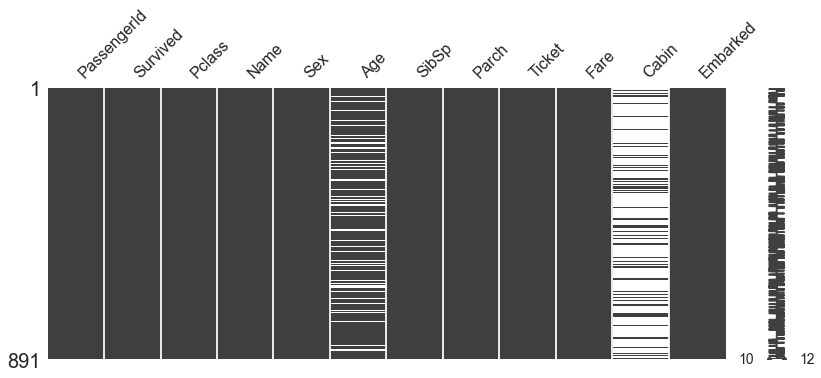

In [73]:
#결측치 시각화
msno.matrix(df_train, figsize=(12,5))

### 📝Age, Cabin 결측치 높음. 특히 Cabin의 경우 열 자체 삭제 고려

# 2️⃣EDA(데이터 시각화)

> * **각 특성들 사이에 어떤 관계가 있는지, label class('Survived')에 어느정도의 영향을 미치는지 시각화를 통해서 분석**

### ❗생존자 비율 및 수 확인

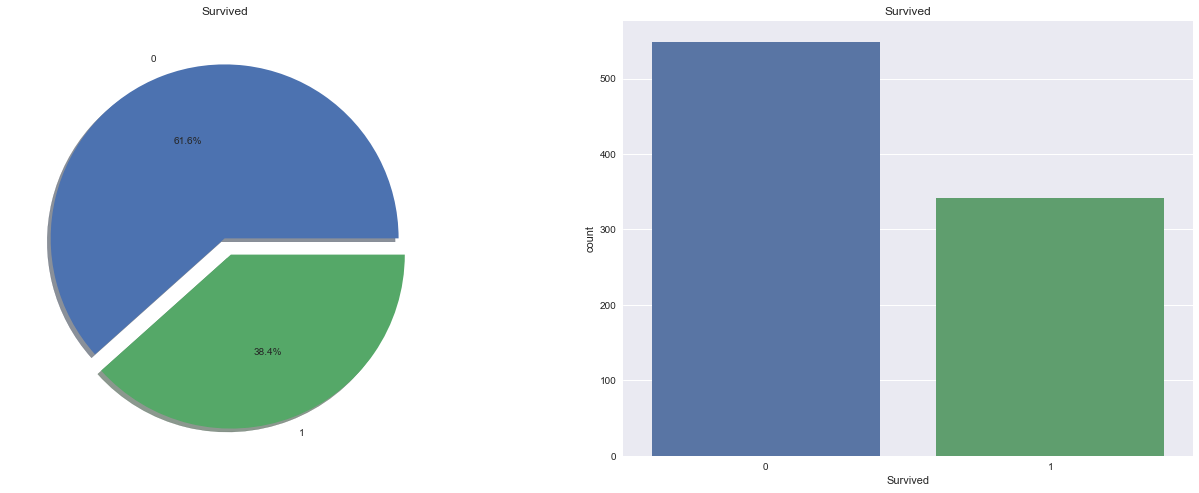

In [74]:
f,ax = plt.subplots(1,2,figsize=(20,8))
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('Survived')
ax[0].set_ylabel('')
#print(ax[1])
sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

### ❗성별에 따른 생존자 확인

In [75]:
df_train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

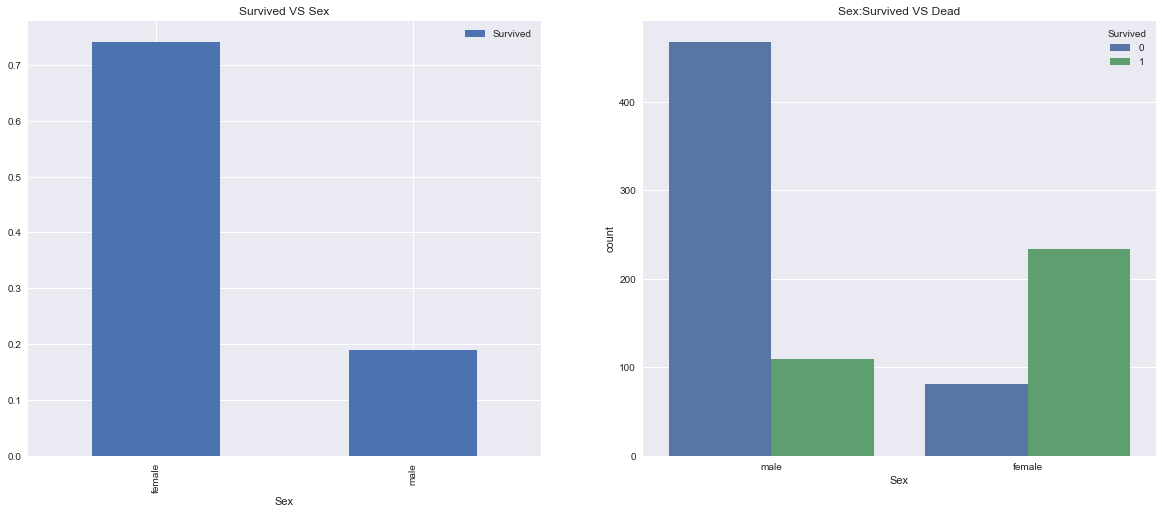

In [76]:
f,ax = plt.subplots(1,2,figsize=(18,8))

df_train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived VS Sex')

sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex:Survived VS Dead')
plt.show

### ❗객실 별 생존자 확인

Text(0.5, 1.0, 'Pclass:Survived vs Dead')

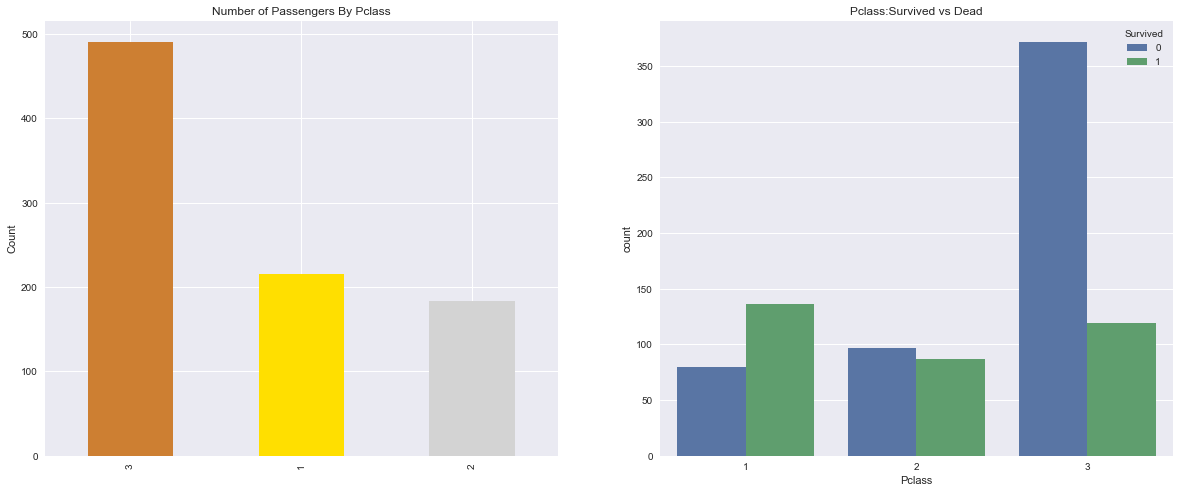

In [77]:
f,ax = plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])

ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

### 📝3등급 객실에 승객이 제일 많고, 사망자가 가장 많았음

### ❗객실등급과 생존자의 관계를 성별을 기준으로 확인

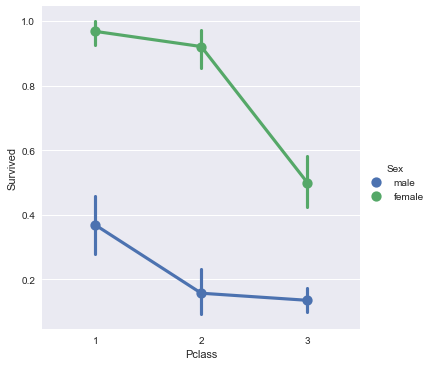

In [78]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train)

### ❗나이 확인(최연소자, 최고령자, 평균나이 중심으로)

In [79]:
print('최고령자:',df_train['Age'].max(),'Years')
print('최연소자:',df_train['Age'].min(),'Years')
print('평균 나이:',df_train['Age'].mean(),'Years')

최고령자: 80.0 Years
최연소자: 0.42 Years
평균 나이: 29.69911764705882 Years


### ❗객실과 나이에 대한 생존율, 성별과 나이에 대한 생존율 확인

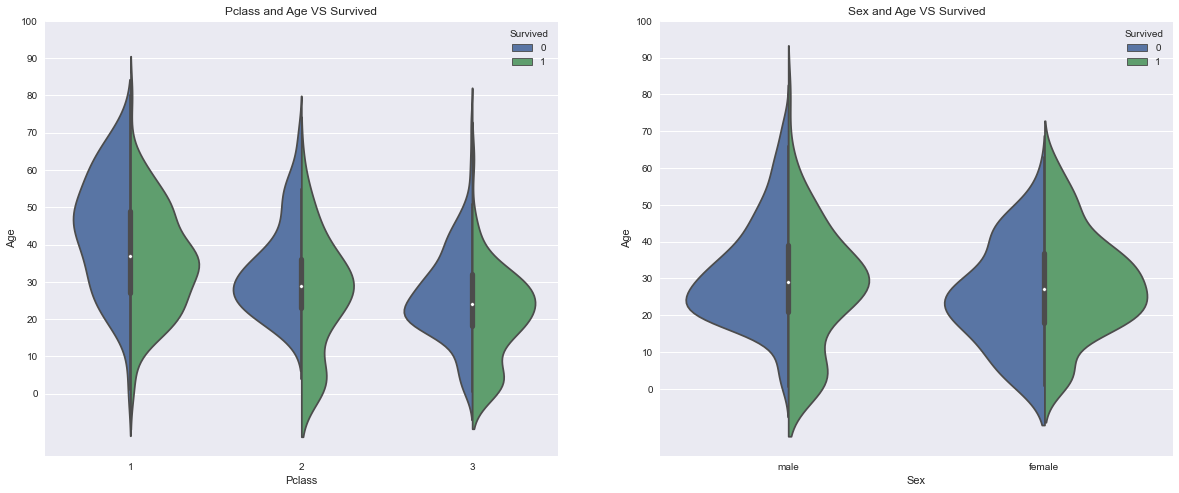

In [80]:
f,ax=plt.subplots(1,2,figsize=(18,8))

sns.violinplot("Pclass","Age",hue="Survived",data=df_train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age VS Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex","Age",hue="Survived",data=df_train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age VS Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

### 📝1등급 객실의 30~40대 생존자 비율 높음, 30대 남성과 여성 생존자 비율 높음

### ❗Age 결측치 처리

> * **임의의 값이 아닌 근거에 기반해 null값 처리**

In [81]:
df_train['Initial']=0
for i in df_train:
    df_train['Initial']=df_train.Name.str.extract('([A-Za-z]+)\.')
print(df_train['Initial'])
print(df_train['Name'])

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object
0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object


### 📝Rev, Master는 오타일 가능성이 있다고 판단

In [82]:
pd.crosstab(df_train.Initial,df_train.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


### ❗오타에 대해 Mr, Mrs, Miss, Other로 변경(Master는 나이가 어린 남자 아이에 대한 호칭)

In [83]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major',
                         'Lady','Countess','Jonkheer','Col',
                         'Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs',
                         'Other','Other','Other','Mr','Mr','Mr'],inplace=True)

pd.crosstab(df_train.Initial,df_train.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


### ❗변경된 이름별로 나이의 평균 구하기

In [84]:
df_train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### ❗Age의 nan데이터에 위 평균값 넣기

In [85]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age']=33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age']=36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age']=5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age']=22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age']=46

In [86]:
print('Age 결측치 갯수 :',df_train.Age.isnull().sum())

Age 결측치 갯수 : 0


### ❗나이별로 사망자 수, 생존자 수 확인

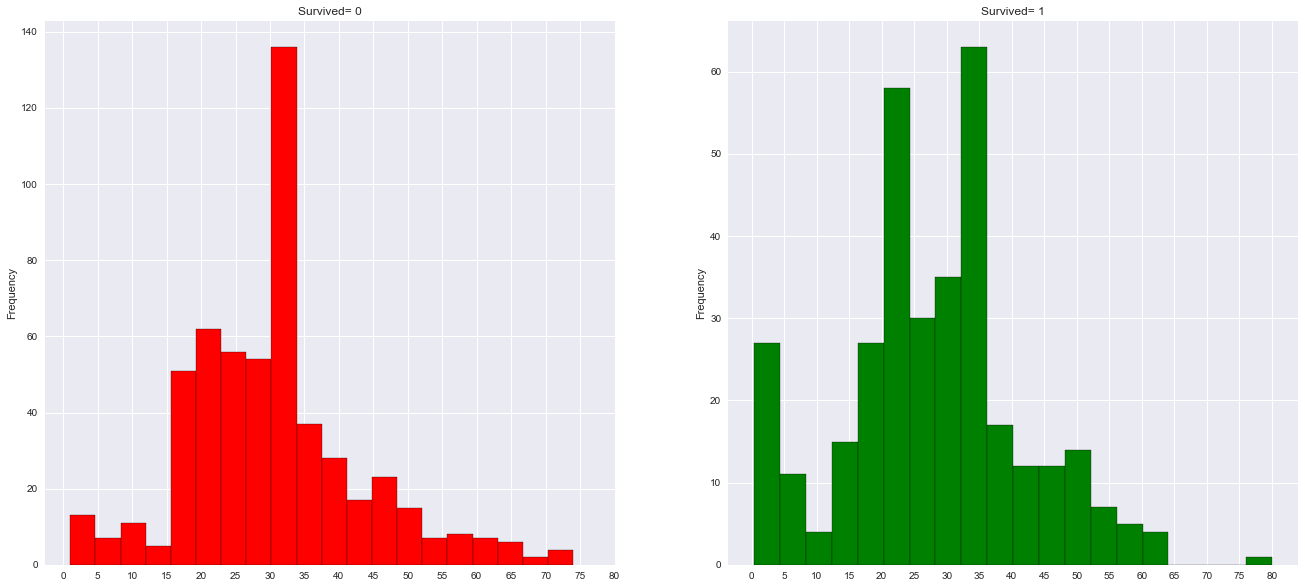

In [87]:
f,ax=plt.subplots(1,2,figsize=(20,10))

df_train[df_train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

df_train[df_train['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()

### 📝사망자 중 30대 제일 많고, 생존자 중 20,30대가 많은 것을 확인

### ❗객실과 생존율을 이름별로 확인

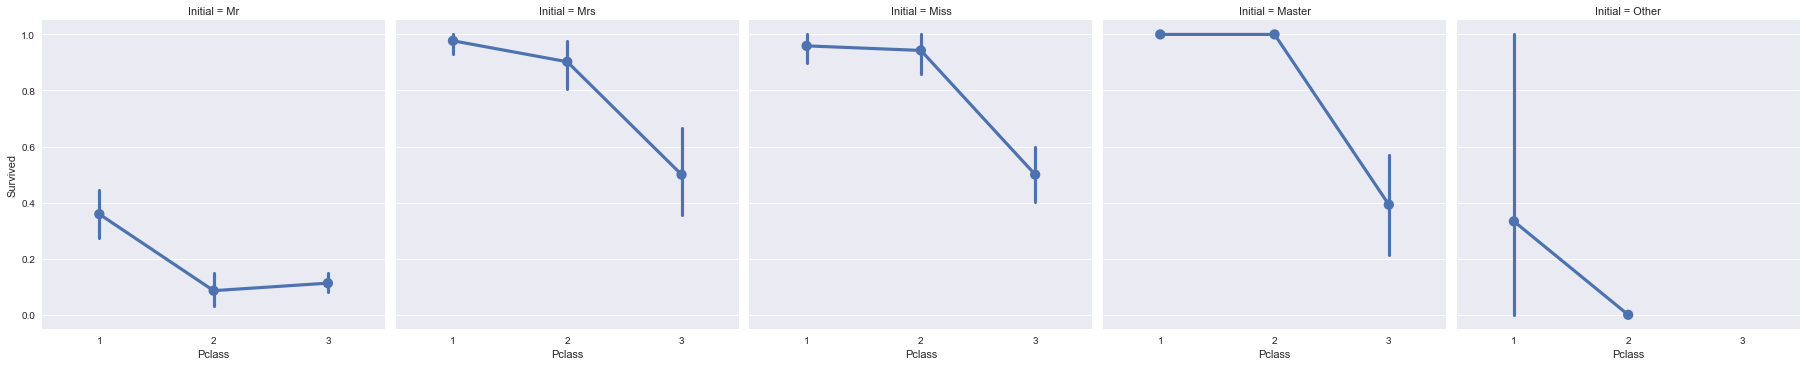

In [88]:
sns.factorplot('Pclass','Survived',col='Initial',data=df_train)
plt.show()

### 📝1등급 객실에서 기혼여성, 미혼여성의 생존율이 높은 것을 확인

### ❗성별, 객실, 배를 탄곳에 대한 생존율 확인

In [89]:
pd.crosstab([df_train.Embarked,df_train.Pclass],[df_train.Sex,df_train.Survived],
            margins=True).style.background_gradient(cmap='summer_r')

### 📝3등급 객실과 S에서 승선한 승객의 사망자 수가 가장 높음

### ❗승선지에 대한 생존율 확인

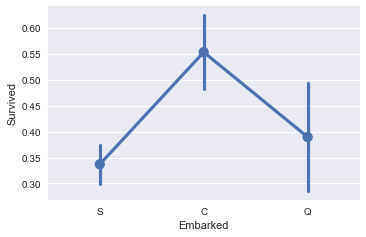

In [90]:
sns.factorplot('Embarked','Survived',data=df_train)
fig = plt.gcf()
fig.set_size_inches(5,3)

### 📝C에서 탄 승객의 생존율 높은것을 확인

### ❗승선지 별로 승객수, 성별 승객수, 생존자수, 객실 등급 별 승객수 확인

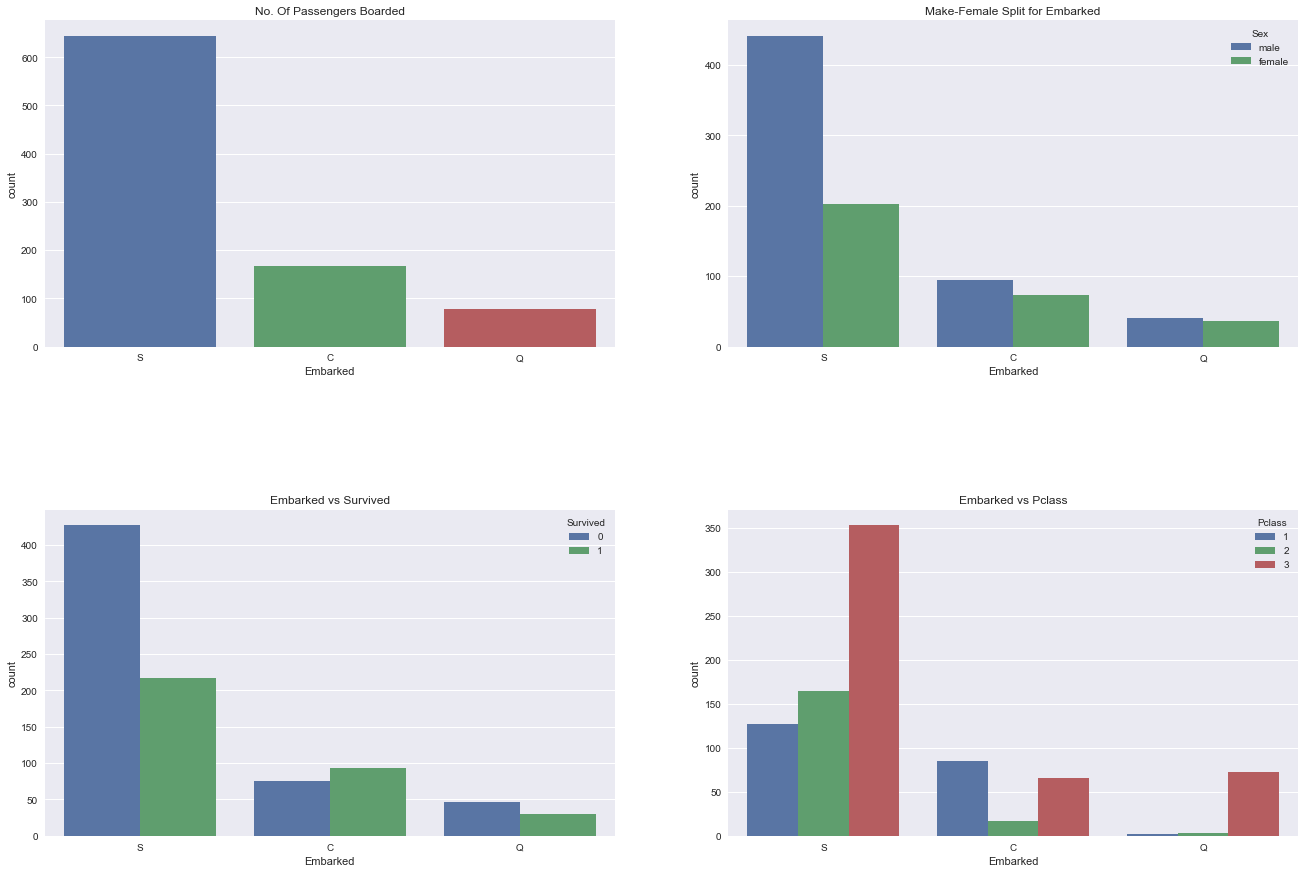

In [91]:
f,ax=plt.subplots(2,2,figsize=(20,15))

sns.countplot('Embarked',data=df_train,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked',hue='Sex',data=df_train,ax=ax[0,1])
ax[0,1].set_title('Make-Female Split for Embarked')

sns.countplot('Embarked',hue='Survived',data=df_train,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked',hue='Pclass',data=df_train,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)

### 📝 1. S에서 승선한 승객이 가장 많음 2. 남자 승객은 S에서 탑승한 승객이 가장 많음 3. 대부분의 사망자중 S에서 승선한 승객 4. 3등급 승객수의 대부분은 S에서 탑승한 승객
 

### ❗ 객실등급과 생존자를 성별과 승선지에 따라 비교

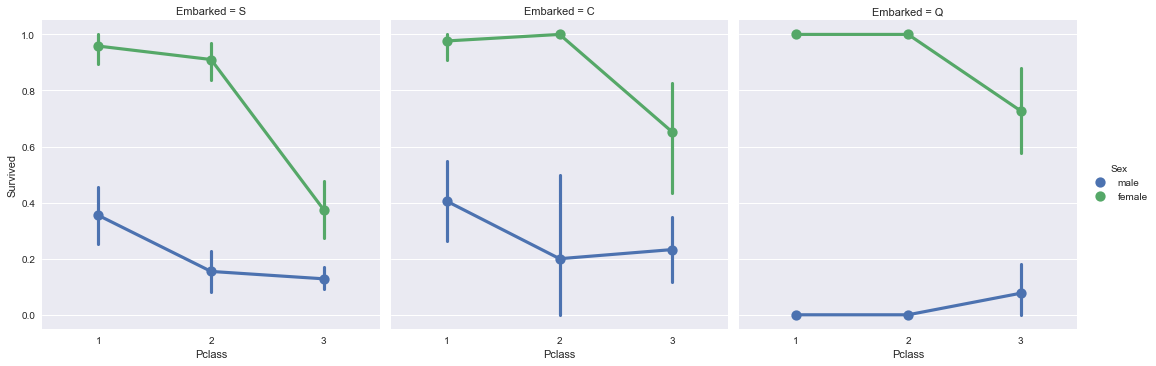

In [92]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=df_train)
plt.show()

### 📝모든 승선지에서 탑승한 승객 중 1,2등급 객실의 여성 승객의 생존율은 높음

### ❗Embarked 결측치 처리

> * **대부분 승객들이 S에서 승선한 것을 확인했으므로 결측치는 S로 채움**

In [93]:
df_train['Embarked'].fillna('S',inplace=True)

In [94]:
df_train.Embarked.isnull().any()

False

In [95]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


### ❗승객 중 형제자매와 배우자 있는지 확인

In [96]:
pd.crosstab([df_train.SibSp], df_train.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


### 📝형제자매가 1명인 승객의 생존자가 많지만, 2명 이상부터는 사망자가 더 많음

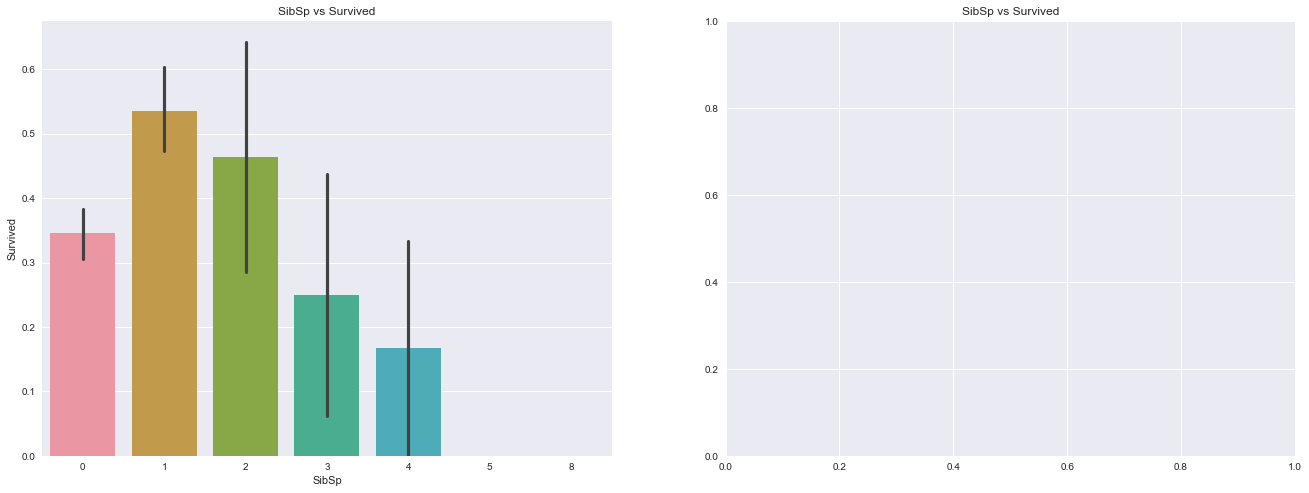

In [97]:
f,ax=plt.subplots(1,2,figsize=(20,8))

sns.barplot('SibSp','Survived',data=df_train,ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp','Survived',data=df_train,ax=ax[1])
ax[1].set_title('SibSp vs Survived')

plt.close(2)
plt.show()

### 📝 가족이 1명일 경우에는 생존율 높지만 그 이상일 경우에는 사망율이 높아짐

### ❗부모와 자식이 있는 승객에 대한 데이터 확인

In [98]:
pd.crosstab(df_train.Parch,df_train.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


### 📝부모와 자식이 있는 승객, 없는 승객 모두 3등급 객실에 가장 많음

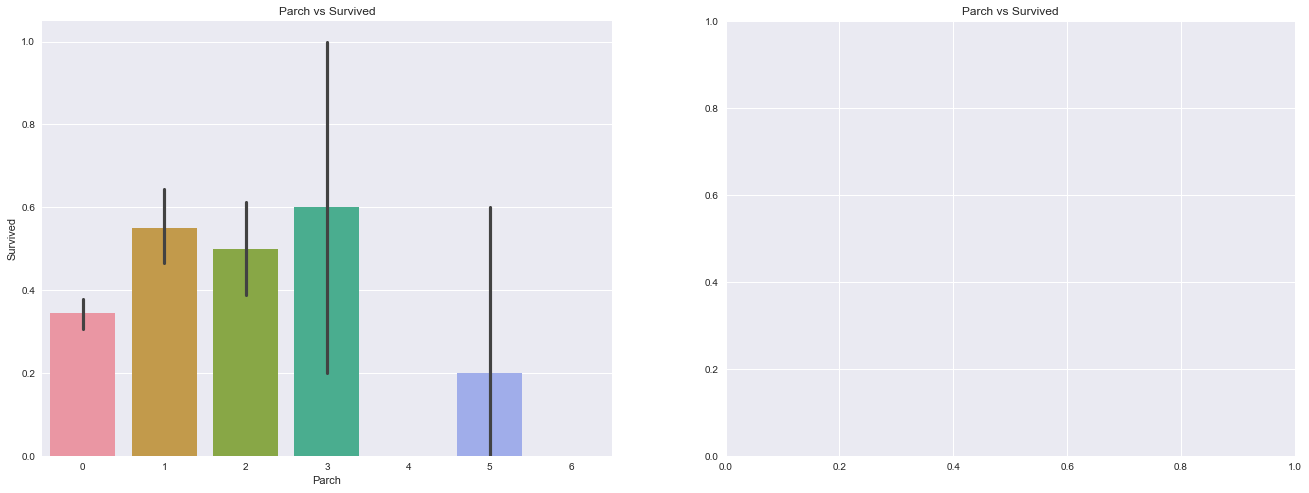

In [99]:
f,ax=plt.subplots(1,2,figsize=(20,8))

sns.barplot('Parch','Survived',data=df_train,ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch','Survived',data=df_train,ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.close(2)
plt.show()

### ✒ Conclusion

> * **Sex = 여성 생존율 높음**

> * **Pclass = 1등급 객실 승객의 생존율이 높은 반면 3등급 객실 승객의 생존율은 낮음**

> * **Age = 어린아이의 생존율 높음, 청년층 생존율 낮음**

> * **Embarked = C에서 승선한 승객들의 생존율 높은 반면 S에서 승선한 승객들의 생존율 낮음**

> * **Parch+Sibsp = 혈연관계가 1명일 경우에는 생존율 높지만 그 이상일 경우 생존율 낮음**

## 3️⃣Data Preprocessing & Feature Engineering

### ❗상관관계 확인

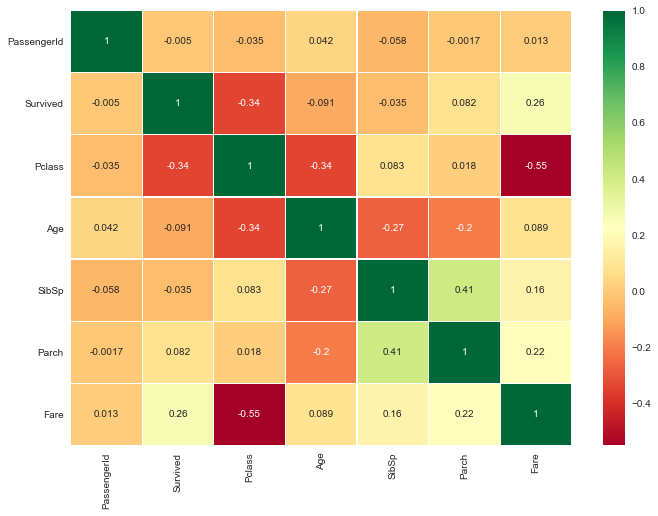

In [100]:
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### ❗Feature Engineering_1

> * **연속된 수인 Age는 ML모델에 적합하지 않음**

> * **Age를 구간별로 나누어서 특성 새로 정의**

In [104]:
df_train['Age_band']=0
df_train.loc[df_train['Age']<=16,'Age_band']=0
df_train.loc[(df_train['Age']>16)&(df_train['Age']<=32),'Age_band']=1
df_train.loc[(df_train['Age']>32)&(df_train['Age']<=48),'Age_band']=2
df_train.loc[(df_train['Age']>48)&(df_train['Age']<=64),'Age_band']=3
df_train.loc[df_train['Age']>64,'Age_band']=4
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [105]:
df_train['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


### 📝 16 ~ 32세 이하의 승객이 가장 많음

### ❗객실별로 생존율과 나이 구간 확인

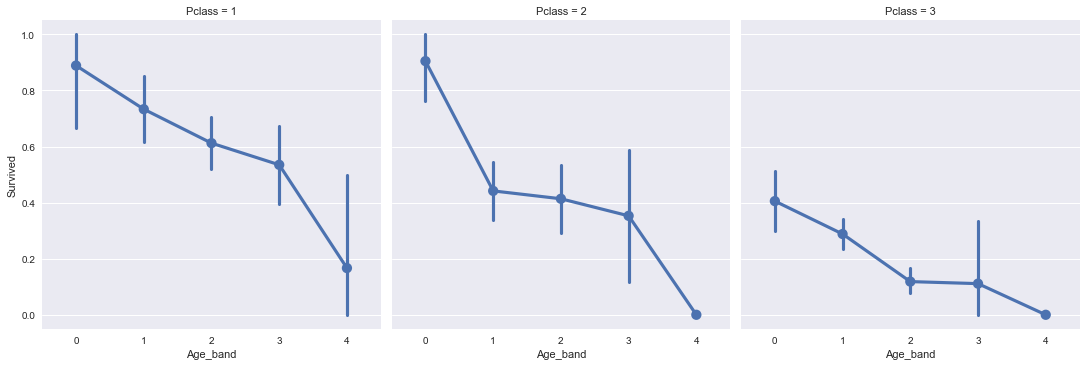

In [106]:
sns.factorplot('Age_band','Survived',data=df_train,col='Pclass')
plt.show()

### ❗가족의 크기를 구하기 위해 Parch, SibSp를 더한 Family_size특성 새로 정의

> * **혼자면 Alone으로 표시**

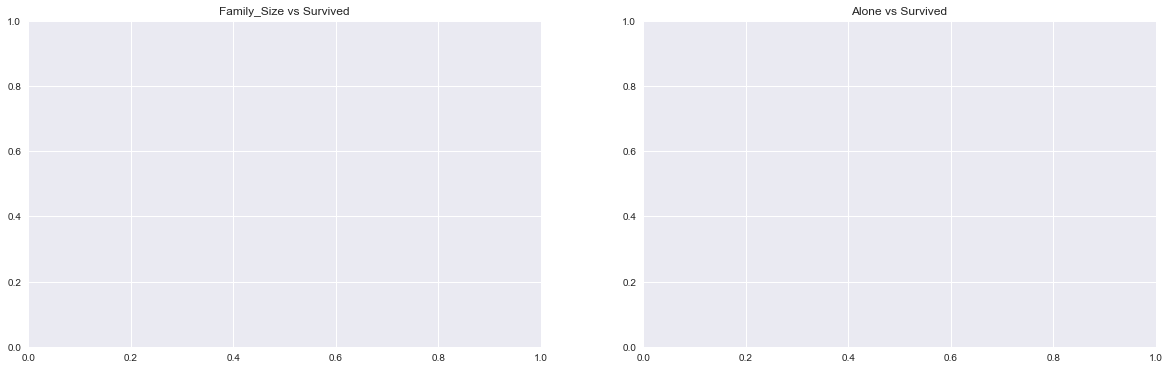

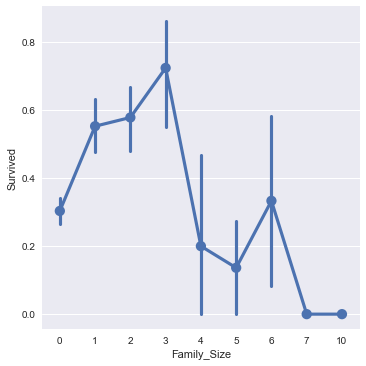

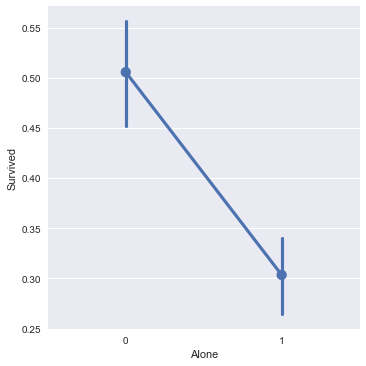

In [111]:
df_train['Family_Size']=0
df_train['Family_Size']=df_train['Parch']+df_train['SibSp']
df_train['Alone']=0
df_train.loc[df_train.Family_Size==0,'Alone']=1

f,ax=plt.subplots(1,2,figsize=(18,6))

sns.factorplot('Family_Size','Survived',data=df_train,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot('Alone','Survived',data=df_train,ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.show()

### 📝가족수가 3명일 경우 생존율이 가장 높은 반면, 혼자인 경우에는 낮은걸 확인

### ❗혼자인 경우의 생존율을 성별,객실 등급에 따라 확인

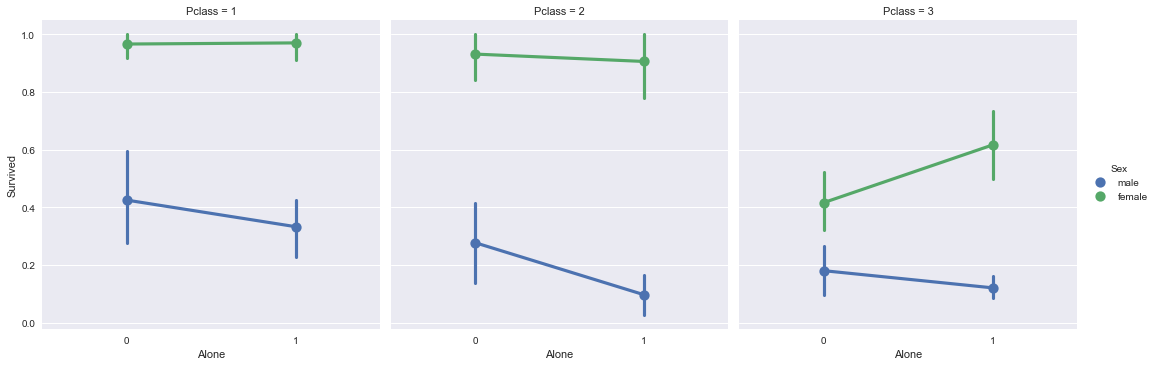

In [113]:
sns.factorplot('Alone','Survived',data=df_train,hue='Sex',col='Pclass')
plt.show()

### 📝객실등급 높고 여성이면 혼자와 상관없이 생존율 높은 반면, 객실등급 낮고 남성이 혼자면 사망율 높음

### ❗Ticket 가격에 따른 분석

> * **연속값인 ticket도 구간별로 정함**

In [116]:
df_train['Fare_Range']=pd.qcut(df_train['Fare'],4)
df_train.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


### 📝티켓값에 따라 생존율 높은 것을 확인

### ❗Age_band와 마찬가지로 encoding

In [117]:
df_train['Fare_cat']=0
df_train.loc[df_train['Fare']<=7.91,'Fare_cat']=0
df_train.loc[(df_train['Fare']>7.91)&(df_train['Fare']<=14.454),'Fare_cat']=1
df_train.loc[(df_train['Fare']>14.454)&(df_train['Fare']<=31),'Fare_cat']=2
df_train.loc[(df_train['Fare']>31)&(df_train['Fare']<=513),'Fare_cat']=3

In [118]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1,"(7.91, 14.454]",1


### ❗티켓 구간에 대한 생존율을 성별로 확인

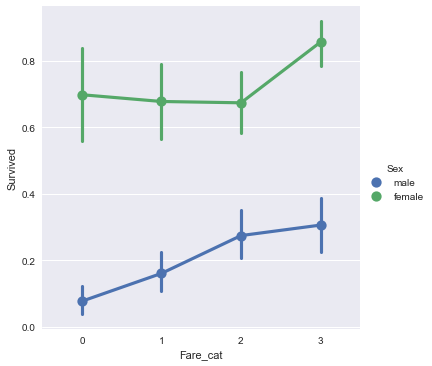

In [119]:
sns.factorplot('Fare_cat','Survived',data=df_train,hue='Sex')
plt.show()

### ❗ Feature_Engineering_2

### 머신러닝 학습을 하기위해 범주형 데이터를 수치형 데이터 변환 필요

In [120]:
df_train['Sex'].replace(['male','female'],[0,1],inplace=True)
df_train['Embarked'].replace(['S','Q','C'],[0,1,2],inplace=True)
df_train['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

### ❗ 사용할 필요가 없는 특성 제외 = Name, Age, Ticket, Fare, Cabin, Fare_range, PassengerId

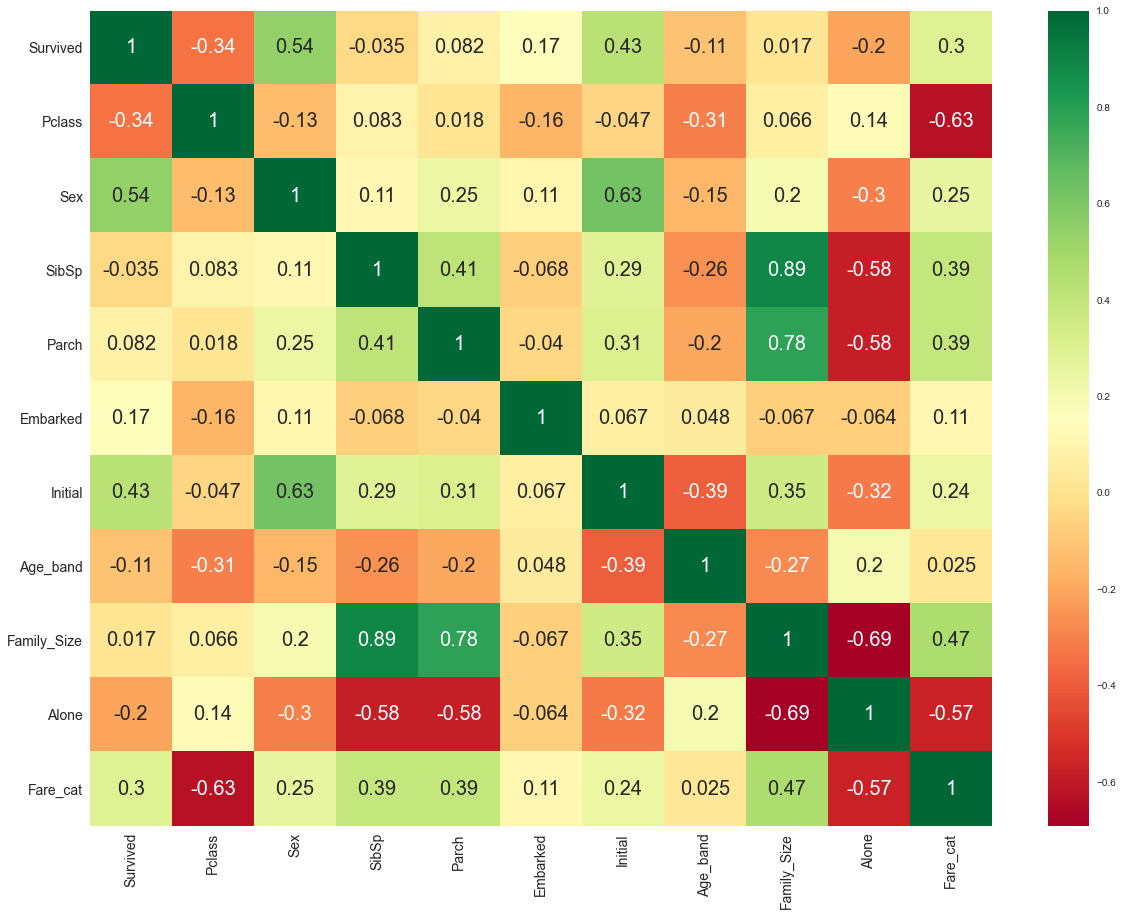

In [121]:
df_train.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)

sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [122]:
df_train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,2,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1
3,1,1,1,1,0,0,1,2,1,0,3
4,0,3,0,0,0,0,0,2,0,1,1


## 4️⃣Modeling

> * **머신러닝 모델을 선택해 생존율 예측**

### ❗사이킷런에서 제공하는 ML 페키지 IMPORT

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm #Support Vector Machine
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [168]:
train,test=train_test_split(df_train,test_size=0.3,random_state=0,stratify=df_train['Survived'])

train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]

test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]

X=df_train[df_train.columns[1:]]
Y=df_train['Survived']

### ❕ rbf_SVM

In [169]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy of rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy of rbf SVM is  0.835820895522388


### 📝84% 정확도

### ❕  Linear-SVM

In [170]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy of Linear SVM is ',metrics.accuracy_score(prediction2,test_Y))

Accuracy of Linear SVM is  0.8171641791044776


### 📝82%정확도

### ❕Logistic Regression

In [171]:
model=LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('Accuracy of the LogisticRegression is ',metrics.accuracy_score(prediction3,test_Y))

Accuracy of the LogisticRegression is  0.8171641791044776


### 📝82%정확도

### ❕Decision Tree

In [172]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('Accuracy of the Decision Tree is ',metrics.accuracy_score(prediction4,test_Y))

Accuracy of the Decision Tree is  0.7985074626865671


### 📝79%정확도

### ❕K-Nearest Neighbours(KNN)

In [173]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('Accuracy of the KNN is ',metrics.accuracy_score(prediction4,test_Y))

Accuracy of the KNN is  0.7985074626865671


### 📝79%정확도

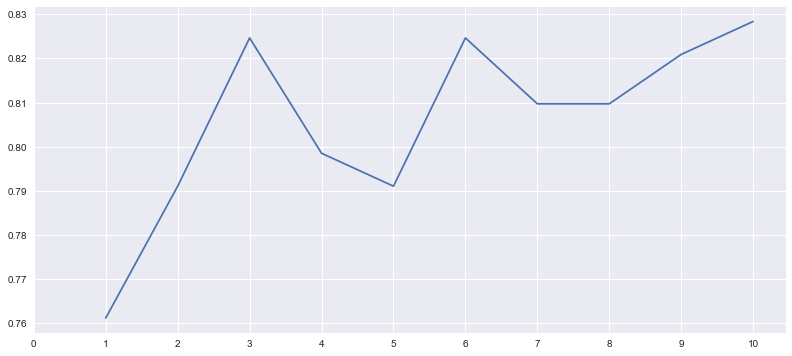

Accuracy of different values of n are :  [0.76119403 0.79104478 0.82462687 0.79850746 0.79104478 0.82462687
 0.80970149 0.80970149 0.82089552 0.82835821] with the max value as  0.8283582089552238


In [174]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index,a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracy of different values of n are : ',a.values,'with the max value as ',a.values.max())

### ❕Gaussian Naive Bayes

In [175]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('Accuracy of the NaiveBayes is ',metrics.accuracy_score(prediction6,test_Y))

Accuracy of the NaiveBayes is  0.8059701492537313


### 📝81%정확도

### ❕Random Forest

In [176]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('Accuracy of the Random Forest is ',metrics.accuracy_score(prediction7,test_Y))

Accuracy of the Random Forest is  0.8246268656716418


### 📝81%정확도

### 5️⃣Validation

> * **K-Fold Validation 검증 사용**

> * **A = [1,2,3]이 있을 때, 처음에는 1이 test용, 2,3은 training용 두 번째는 2가 test용, 1,3이 training용 ... 반복적으로 수행하며 테스트하는 부분과 훈련하는 부분을
변경한다**

In [177]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits=10,shuffle=True,random_state=22)
xyz = []
accuracy = []
std = []
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=10)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y,cv=kfold,scoring="accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)
new_models_dataframe2


,CV Mean,Std
Linear Svm,0.789101,0.062636
Radial Svm,0.828377,0.057096
Logistic Regression,0.799164,0.037325
KNN,0.803633,0.040654
Decision Tree,0.804744,0.042234
Naive Bayes,0.787978,0.061349
Random Forest,0.810400,0.048697


<AxesSubplot:>

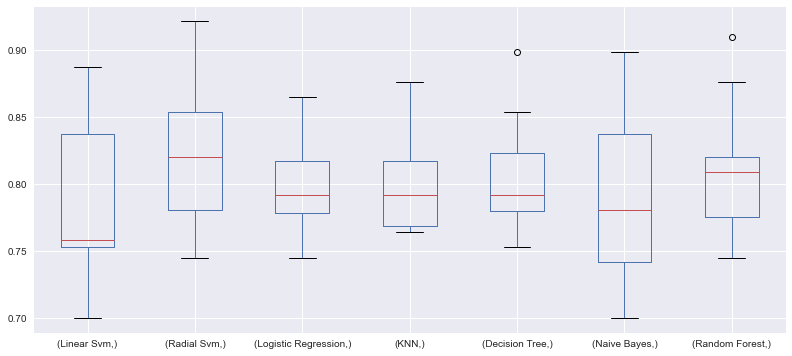

In [183]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

### 📝정확도는 SVM이 제일 높고, 표준편차는 Logistic Regression이 가장 낮음

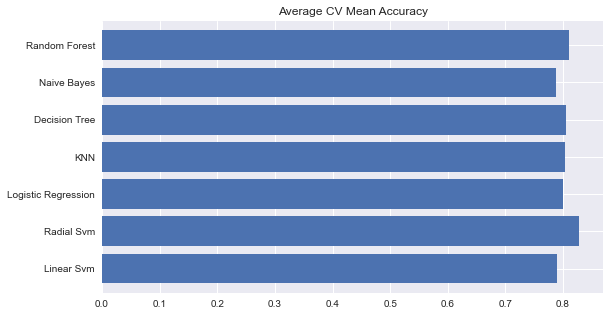

In [181]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()